# Ejercicios 1

Ejercicios relacionados con el [Notebook de Aleatoreidad](01_Aleatoreidad.ipynb).

In [1]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pylab as plt
from numpy import random as random

### Ejercicio 1

a. Hacer un plot similar al que muestra la evolución de la fracción de elementos de la muestra que caen en el cuadrante superior derecho. Usar un método que resulte en una mejora significativa de la eficiencia.

<b>Tip</b>: en lugar de generar una muestra nueva para cada tamaño, usar sub-conjuntos de una sola muestra.

b. Verificar que la nueva implementación es más eficiente que la del [notebook](01_Aleatoreidad.ipynb).

<b>Tip</b>: medir el tiempo de corrida con <tt>timeit</tt> o <tt>time.process_time</tt>.

RESPUESTA:

Metodo Anterior:

Primero defino una funcion que lo que hace es generar una muestra, y que calcula la fracción de elementos que caen en el cuadrante superior derecho y su incerteza

In [2]:

import numpy as np

def fraccion_ad(n, seed=None):

    # Fijar la semilla
    if seed is not None:
        np.random.seed(seed)

    # a partir de aca lo hago yo 
    # Crear la muestra.    

    sample = random.rand(n, 2) #creo la muestra entre 0 y 1
    sample = sample *2 -1 # la hago entre -1 y 1
    
    cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)  #agarro el primer cuadrante
    n_ad = np.sum(cond) #sumo la cantidad de muestras en el primer cuadrante
    
    f_ad = n_ad / len(sample) #
    sd_f = sqrt(n_ad)/len(sample)
    
    return f_ad , sd_f



In [3]:
# Crea dos listas vacías
f = [] #para el valor de fraccion
sd = [] #y de incerteza

# Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
# Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
sizes = 2**np.arange(4, 14) #2^{todos los numeros entre 4 y 14}

# Iteramos en los tamaños (usamos siempre el mismo seed?)
for size in sizes:  #recorro todos los valores de sizes
    output = fraccion_ad(size) #meto los distintos valores de tamaños creados en la funcion que hice antes
    f.append(output[0]) # aca meto las fracciones
    sd.append(output[1]) #aca meto la incertezas
    
# Veamos que obtuvimos
for i in range(len(f)): #para cada valor de f
    print('{}, {}'.format(f[i], sd[i])) #imprimo su f y su sd

0.375, 0.15309310892394862
0.1875, 0.07654655446197431
0.296875, 0.06810779599282303
0.203125, 0.03983608994994363
0.26171875, 0.03197403426512676
0.248046875, 0.022010600917157508
0.2509765625, 0.015655487833868553
0.25830078125, 0.01123046875
0.241943359375, 0.007685584100926364
0.2515869140625, 0.0055417770814532065


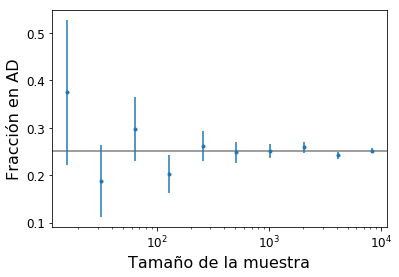

In [4]:
plt.errorbar(sizes, f, sd, fmt='.') #ploteo con barras de error

# Para que sea más legible, hacemos el eje x logarítmico
ax = plt.gca()
ax.set_xscale('log')
ax.axhline(0.25, color='0.5', zorder=-1)

ax.set_xlabel('Tamaño de la muestra', fontsize=16)
ax.set_ylabel('Fracción en AD', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

Nueva forma, mas eficiente:
    
    Lo que se hace es ir estirando la muestra para que cada vez sea mas grande, en vez de ir armando una muestra desde 0 cada vez.

Primero defino una funcion que unicamente crea el sample aleatorio segun el tamaño indicado

In [5]:
def create_n_sample_rand(n, seed=None):

    # Fijar la semilla
    if seed is not None:
        np.random.seed(seed)

    sample = random.rand(n, 2) #creo la muestra entre 0 y 1
    sample = sample *2 -1 # la hago entre -1 y 1
    
    return sample

Segundo defino def forma independiente las funciones que calculan:

fraccion de elementos en el cuadrante superior derecho

la incerteza en el cuadrante superior derecho 

Y ademas hago que la entrada a las funciones sean simplemente el sample generado




In [6]:
import numpy as np

def incerteza_cuadrante_sup_der(sample):
    
    cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)  #agarro el primer cuadrante
    n_ad = np.sum(cond) #sumo la cantidad de muestras en el primer cuadrante
    
    sd_f = sqrt(n_ad)/len(sample)
    
    return sd_f

def fraccion_cuadrante_sup_der(sample):
    
    cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)  #agarro el primer cuadrante
    n_ad = np.sum(cond) #sumo la cantidad de muestras en el primer cuadrante
    
    f_ad = n_ad / len(sample) #
    
    return f_ad

def fraccion_e_incerteza_cuadrante_sup_der(sample):
    
    cond = (sample[:, 0] > 0) * (sample[:, 1] > 0)  #agarro el primer cuadrante
    n_ad = np.sum(cond) #sumo la cantidad de muestras en el primer cuadrante
    
    f_ad = n_ad / len(sample)
    sd_f = sqrt(n_ad)/len(sample)
    
    return f_ad, sd_f



In [7]:
# Crea dos listas vacías
f = [] #para el valor de fraccion
sd = [] #y de incerteza

# Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
# Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
tamaños_a_examinar = 2**np.arange(4, 14) #2^{todos los numeros entre 4 y 14}
print(tamaños_a_examinar.shape)
sizes

(10,)


array([  16,   32,   64,  128,  256,  512, 1024, 2048, 4096, 8192],
      dtype=int32)

In [8]:
#voy a usar la funcion append de numpy para ir estirando el arreglo
x=random.rand(3,2)
y=random.rand(6,2)
print("x: \n",x)
print("\n")
print("y: \n", y)
print("\n")

x=np.append(x,y, axis=0)
print(x.shape)

x: 
 [[0.57617019 0.84111232]
 [0.50899292 0.72706283]
 [0.25004417 0.24043137]]


y: 
 [[0.69706229 0.19013458]
 [0.53941478 0.03198693]
 [0.5104707  0.18163344]
 [0.57240824 0.43664882]
 [0.83992671 0.33429666]
 [0.40027079 0.44805151]]


(9, 2)


In [9]:
tamaños_a_examinar = 2**np.arange(4, 14)
sample=create_n_sample_rand(16) #16=2**4 --> tengo un sample de 16 muestras
f=[]
sd=[]
for size in tamaños_a_examinar:  #recorro todos los valores de sizes     
    print(size)
    f.append(fraccion_cuadrante_sup_der(sample)) # aca meto las fracciones
    sd.append(incerteza_cuadrante_sup_der(sample)) #aca meto la incertezas
    print(sample.shape)
    sample=np.vstack((sample,create_n_sample_rand(size)))
    
    

16
(16, 2)
32
(32, 2)
64
(64, 2)
128
(128, 2)
256
(256, 2)
512
(512, 2)
1024
(1024, 2)
2048
(2048, 2)
4096
(4096, 2)
8192
(8192, 2)


In [10]:
# Veamos que obtuvimos
print(len(f),len(sd))
# Veamos que obtuvimos
for i in range(len(f)): #para cada valor de f
    print('{}, {}'.format(f[i], sd[i])) #imprimo su f y su sd

10 10
0.1875, 0.10825317547305482
0.1875, 0.07654655446197431
0.1875, 0.05412658773652741
0.21875, 0.04133986423538423
0.20703125, 0.028437929255002024
0.21875, 0.020669932117692115
0.25, 0.015625
0.24267578125, 0.010885496489066384
0.2509765625, 0.007827743916934277
0.2476806640625, 0.005498586733181254


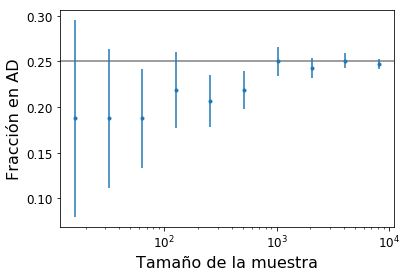

In [11]:
plt.errorbar(sizes, f, sd, fmt='.') #ploteo con barras de error

# Para que sea más legible, hacemos el eje x logarítmico
ax = plt.gca()
ax.set_xscale('log')
ax.axhline(0.25, color='0.5', zorder=-1)

ax.set_xlabel('Tamaño de la muestra', fontsize=16)
ax.set_ylabel('Fracción en AD', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

Comparacion de tiempos:

In [12]:
# Python program to show time by process_time()  
from time import process_time 

In [13]:
#Ejemplo de uso de time:

# Start the stopwatch / counter  
t1_start = process_time()  

for i in range(800): 
    if i>100 and i<500:
        print(i, end =' ') 
   
  
# Stop the stopwatch / counter 
t1_stop = process_time() 

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 

In [14]:
print("t1_stop-t")
print("Elapsed time:", t1_stop, t1_start)  
   
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start) 

t1_stop-t
Elapsed time: 2.203125 2.1875
Elapsed time during the whole program in seconds: 0.015625


Entonces uso process time para el ejercicio:

In [50]:
t1_start = process_time()  
# Crea dos listas vacías
f = [] #para el valor de fraccion
sd = [] #y de incerteza

# Crea un arreglo con los tamaños de las muestras que vamos a usar. Generamos valores desde 2^4 hasta 2^13.
# Vamos a espacirlo en log, para tener más resolución en los tamaños pequeños.
sizes = 2**np.arange(4, 24) #2^{todos los numeros entre 4 y 14}

# Iteramos en los tamaños (usamos siempre el mismo seed?)
for size in sizes:  #recorro todos los valores de sizes
    output = fraccion_ad(size) #meto los distintos valores de tamaños creados en la funcion que hice antes
    f.append(output[0]) # aca meto las fracciones
    sd.append(output[1]) #aca meto la incertezas
t1_stop = process_time() 

print("Tiempo de la primera forma:",t1_stop-t1_start) 

Tiempo de la primera forma: 1.5


In [52]:

t2_start = process_time()  
f = [] #para el valor de fraccion
sd = [] #y de incerteza

tamaños_a_examinar = 2**np.arange(4, 24)
sample=create_n_sample_rand(16) #16=2**4 --> tengo un sample de 16 muestras

for size in tamaños_a_examinar:  #recorro todos los valores de sizes     
    aux=fraccion_e_incerteza_cuadrante_sup_der(sample)
    f.append(aux[0]) # aca meto las fracciones
    sd.append(aux[1]) #aca meto la incertezas
    #sample=np.vstack((sample,create_n_sample_rand(size)))
t2_stop = process_time() 
print("Tiempo de la segunda forma:",t2_stop-t2_start)

Tiempo de la segunda forma: 0.03125


### Ejercicio 2

a. Usando las muestras que pueden obtenerse del repositorio, realizar un análisis de fracción de muestras en el cuadrante superior derecho para cada una de ellas. Presentar plots similares, en una misma figura.

b. ¿Qué conjunto de datos muestra indicios de tener una distribución diferente a la uniforme?

c. ¿A partir de qué tamaño de muestra puede identificarse la muestra no uniforme?